# CPHD Processing


In [1]:
from sarpy.io.phase_history.cphd import CPHDReader
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt


## Basic CPHD data check

In [ ]:
%%time
cphd_file_path = "../../data/cphd/SkyFi_2421P7ON-2_2024-01-06_0025Z_SAR_VERY-HIGH_Ishikawa-Japan_CPHD.cphd"

cphd = CPHDReader(cphd_file_path)

CPU times: user 13.6 ms, sys: 3.99 ms, total: 17.5 ms
Wall time: 22.7 ms


### Meta data

In [3]:
for k, v in cphd.__dict__.items():
    pprint(k)
    pprint(v)
    pprint("-"*100)


'_channel_map'
OrderedDict({'Primary': 0})
'----------------------------------------------------------------------------------------------------'
'_pvp_memmap'
OrderedDict([('Primary',
              memmap([(1.32486933e-03, [-4346071.4849658 ,  3517624.41379325,  4080271.56293548], [-2410.08053676,  4042.81867773, -6049.32206847], 5.88282401e-03, [-4346082.46994357,  3517642.84073753,  4080243.99034862], [-2410.05416899,  4042.80111337, -6049.34446097], [-3704430.41992188,  3468416.74804688,  3850795.41015625], -3.48877818e-06, -5.39007562e-12, -5.6146726e-22, 9.35340945e+09, 9.84655464e+09, -1.50864198e-05, 1.57935802e-05, -1.59106844e-05, 1.59127072e-05, 2.09098513e-08, 9.35281352e+09, 24719.32452149, 1),
        (1.46977067e-03, [-4346071.83418963,  3517624.99960303,  4080270.6863806 ], [-2410.07969851,  4042.81811934, -6049.32278035], 6.02772585e-03, [-4346082.81916479,  3517643.42654681,  4080243.11378743], [-2410.05333074,  4042.80055498, -6049.34517285], [-3704430.41992188,  346

In [4]:
cphd._channel_map

OrderedDict([('Primary', 0)])

#### pvp memmap (pvp: platform vector parameters)

In [5]:
print(len(cphd._pvp_memmap["Primary"]))
for value, dtype in zip(cphd._pvp_memmap["Primary"][0], cphd._pvp_memmap["Primary"].dtype.names):
    print(f"{dtype}: {value}")
    print("-"*100)


40750
TxTime: 0.0013248693333333334
----------------------------------------------------------------------------------------------------
TxPos: [-4346071.4849658   3517624.41379325  4080271.56293548]
----------------------------------------------------------------------------------------------------
TxVel: [-2410.08053676  4042.81867773 -6049.32206847]
----------------------------------------------------------------------------------------------------
RcvTime: 0.005882824012451061
----------------------------------------------------------------------------------------------------
RcvPos: [-4346082.46994357  3517642.84073753  4080243.99034862]
----------------------------------------------------------------------------------------------------
RcvVel: [-2410.05416899  4042.80111337 -6049.34446097]
----------------------------------------------------------------------------------------------------
SRPPos: [-3704430.41992188  3468416.74804688  3850795.41015625]
----------------------------

#### support array memmap

In [6]:
cphd._support_array_memmap.keys()


odict_keys(['Antenna', 'Antenna_element'])

In [7]:
cphd._support_array_memmap["Antenna"]

memmap([[[14.9054165 , -0.25933152],
         [14.956358  , -0.25724852],
         [15.049662  , -0.25557327],
         ...,
         [15.797863  , -0.27602962],
         [15.538022  , -0.2796853 ],
         [15.308798  , -0.28351587]],

        [[15.279368  , -0.25710127],
         [15.37601   , -0.25485545],
         [15.511588  , -0.25302565],
         ...,
         [15.610123  , -0.2732163 ],
         [15.28561   , -0.2765218 ],
         [14.990484  , -0.28008366]],

        [[15.663591  , -0.25559664],
         [15.799719  , -0.25322   ],
         [15.970378  , -0.25125787],
         ...,
         [15.437044  , -0.27070355],
         [15.0467415 , -0.27357087],
         [14.682535  , -0.27675834]],

        ...,

        [[14.353219  , -0.2504513 ],
         [15.007452  , -0.24799176],
         [15.626063  , -0.24625994],
         ...,
         [18.02462   , -0.2778609 ],
         [17.7048    , -0.28190833],
         [17.378319  , -0.2855654 ]],

        [[14.340034  , -0.24842487

In [8]:
cphd._support_array_memmap["Antenna_element"]

memmap([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype='>f4')

#### cphd meta

In [9]:
pprint(cphd._cphd_meta.to_dict().keys())

odict_keys(['CollectionID', 'Global', 'SceneCoordinates', 'Data', 'Channel', 'PVP', 'SupportArray', 'Dwell', 'ReferenceGeometry', 'Antenna', 'TxRcv', 'ErrorParameters', 'ProductInfo'])


##### CollectionID

In [10]:
for k, v in cphd._cphd_meta.to_dict()["CollectionID"].items():
    print(k)
    print(v)
    print("-"*100)


CollectorName
Umbra-05
----------------------------------------------------------------------------------------------------
CoreName
2024-01-06T00:25:37_Umbra-05
----------------------------------------------------------------------------------------------------
CollectType
MONOSTATIC
----------------------------------------------------------------------------------------------------
RadarMode
OrderedDict({'ModeType': 'SPOTLIGHT'})
----------------------------------------------------------------------------------------------------
Classification
UNCLASSIFIED
----------------------------------------------------------------------------------------------------
ReleaseInfo

----------------------------------------------------------------------------------------------------
Parameters
OrderedDict({'task_id': '9198e13d-243e-4b97-8ff1-acaf3acd05d5', 'telemetry_source': 'telemetry'})
----------------------------------------------------------------------------------------------------


##### Global

In [11]:
for k, v in cphd._cphd_meta.to_dict()["Global"].items():
    print(k)
    print(v)
    print("-" * 100)


DomainType
FX
----------------------------------------------------------------------------------------------------
SGN
-1
----------------------------------------------------------------------------------------------------
Timeline
OrderedDict({'CollectionStart': '2024-01-06T00:25:37.000000Z', 'TxTime1': 0.0013248693333333334, 'TxTime2': 5.923555221333333})
----------------------------------------------------------------------------------------------------
FxBand
OrderedDict({'FxMin': 9353409445.37893, 'FxMax': 9846554644.871504})
----------------------------------------------------------------------------------------------------
TOASwath
OrderedDict({'TOAMin': -1.5086834635168112e-05, 'TOAMax': 1.5909091053510563e-05})
----------------------------------------------------------------------------------------------------
TropoParameters
OrderedDict({'N0': 347.8398585689221, 'RefHeight': 'ZERO'})
---------------------------------------------------------------------------------------------

##### SceneCoordinates

In [12]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"].items():
    print(k)
    print(v)
    print("-"*100)


EarthModel
WGS_84
----------------------------------------------------------------------------------------------------
IARP
OrderedDict({'ECF': OrderedDict({'X': -3704430.419921875, 'Y': 3468416.748046875, 'Z': 3850795.41015625}), 'LLH': OrderedDict({'Lat': np.float64(37.377448698565765), 'Lon': np.float64(136.8845669015155), 'HAE': np.float64(50.94281009640909)})})
----------------------------------------------------------------------------------------------------
ReferenceSurface
OrderedDict({'Planar': OrderedDict({'uIAX': OrderedDict({'X': np.float64(0.7775791031017399), 'Y': np.float64(0.5912252990307627), 'Z': np.float64(0.21406397222671286)}), 'uIAY': OrderedDict({'X': np.float64(-0.2426481511887184), 'Y': np.float64(0.5962137690477566), 'Z': np.float64(-0.7652783913861447)})})})
----------------------------------------------------------------------------------------------------
ImageArea
OrderedDict({'X1Y1': OrderedDict({'X': -2500.0, 'Y': -2500.0}), 'X2Y2': OrderedDict({'X': 25

###### IARP

In [13]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"]["IARP"].items():
    print(k)
    print(v)
    print("-" * 100)


ECF
OrderedDict({'X': -3704430.419921875, 'Y': 3468416.748046875, 'Z': 3850795.41015625})
----------------------------------------------------------------------------------------------------
LLH
OrderedDict({'Lat': np.float64(37.377448698565765), 'Lon': np.float64(136.8845669015155), 'HAE': np.float64(50.94281009640909)})
----------------------------------------------------------------------------------------------------


###### ReferenceSurface

In [14]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"]["ReferenceSurface"].items():
    print(k)
    print("-" * 100)
    if isinstance(v, dict):
        for ck, cv in v.items():
            print(ck)
            print(cv)

    else:
        print(v)

    print("-" * 100)


Planar
----------------------------------------------------------------------------------------------------
uIAX
OrderedDict({'X': np.float64(0.7775791031017399), 'Y': np.float64(0.5912252990307627), 'Z': np.float64(0.21406397222671286)})
uIAY
OrderedDict({'X': np.float64(-0.2426481511887184), 'Y': np.float64(0.5962137690477566), 'Z': np.float64(-0.7652783913861447)})
----------------------------------------------------------------------------------------------------


###### ImageArea

In [15]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"]["ImageArea"].items():
    print(k)
    print("-" * 100)
    if isinstance(v, dict):
        for ck, cv in v.items():
            print(ck)
            print(cv)
            
    else:
        print(v)

    print("-" * 100)


X1Y1
----------------------------------------------------------------------------------------------------
X
-2500.0
Y
-2500.0
----------------------------------------------------------------------------------------------------
X2Y2
----------------------------------------------------------------------------------------------------
X
2500.0
Y
2500.0
----------------------------------------------------------------------------------------------------
Polygon
----------------------------------------------------------------------------------------------------
[OrderedDict({'X': -2500.0, 'Y': -2500.0, 'index': 1}), OrderedDict({'X': -2500.0, 'Y': 2500.0, 'index': 2}), OrderedDict({'X': 2500.0, 'Y': 2500.0, 'index': 3}), OrderedDict({'X': 2500.0, 'Y': -2500.0, 'index': 4})]
----------------------------------------------------------------------------------------------------


###### ExtendedArea

In [16]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"]["ExtendedArea"].items():
    print(k)
    print("-" * 100)
    if isinstance(v, dict):
        for ck, cv in v.items():
            print(ck)
            print(cv)

    else:
        print(v)

    print("-" * 100)


X1Y1
----------------------------------------------------------------------------------------------------
X
-3383.758868241297
Y
-3518.6772021863694
----------------------------------------------------------------------------------------------------
X2Y2
----------------------------------------------------------------------------------------------------
X
3383.758868241297
Y
3518.6772021863694
----------------------------------------------------------------------------------------------------
Polygon
----------------------------------------------------------------------------------------------------
[OrderedDict({'X': -3383.758868241297, 'Y': -3518.6772021863694, 'index': 1}), OrderedDict({'X': -3383.758868241297, 'Y': 3518.6772021863694, 'index': 2}), OrderedDict({'X': 3383.758868241297, 'Y': 3518.6772021863694, 'index': 3}), OrderedDict({'X': 3383.758868241297, 'Y': -3518.6772021863694, 'index': 4})]
------------------------------------------------------------------------------------

###### ImageAreaCornerPoints

In [17]:
cphd._cphd_meta.to_dict()["SceneCoordinates"]["ImageAreaCornerPoints"]


[OrderedDict([('Lat', 37.39306841372049),
              ('Lon', 136.9193603766611),
              ('index', 1)]),
 OrderedDict([('Lat', 37.34968634488258),
              ('Lon', 136.90413883504883),
              ('index', 2)]),
 OrderedDict([('Lat', 37.36181871030261),
              ('Lon', 136.8497878589042),
              ('index', 3)]),
 OrderedDict([('Lat', 37.40520768030279),
              ('Lon', 136.86498053544287),
              ('index', 4)])]

###### ImageGrid

In [18]:
for k, v in cphd._cphd_meta.to_dict()["SceneCoordinates"]["ImageGrid"].items():
    print(k)
    print("-" * 100)
    if isinstance(v, dict):
        for ck, cv in v.items():
            print(ck)
            print(cv)

    else:
        print(v)

    print("-" * 100)


IARPLocation
----------------------------------------------------------------------------------------------------
Line
15662.0
Sample
15662.0
----------------------------------------------------------------------------------------------------
IAXExtent
----------------------------------------------------------------------------------------------------
LineSpacing
0.15961788945620284
FirstLine
0
NumLines
31325
----------------------------------------------------------------------------------------------------
IAYExtent
----------------------------------------------------------------------------------------------------
SampleSpacing
0.15961788945620284
FirstSample
0
NumSamples
31325
----------------------------------------------------------------------------------------------------


##### Data

In [19]:
for k, v in cphd._cphd_meta.to_dict()["Data"].items():
    print(k)
    print(v)
    print("-" * 100)


SignalArrayFormat
CF8
----------------------------------------------------------------------------------------------------
NumBytesPVP
240
----------------------------------------------------------------------------------------------------
NumCPHDChannels
1
----------------------------------------------------------------------------------------------------
Channels
[OrderedDict({'Identifier': 'Primary', 'NumVectors': 40750, 'NumSamples': 19999, 'SignalArrayByteOffset': 0, 'PVPArrayByteOffset': 0})]
----------------------------------------------------------------------------------------------------
NumSupportArrays
2
----------------------------------------------------------------------------------------------------
SupportArrays
[OrderedDict({'Identifier': 'Antenna', 'NumRows': 201, 'NumCols': 201, 'BytesPerElement': 8, 'ArrayByteOffset': 0}), OrderedDict({'Identifier': 'Antenna_element', 'NumRows': 2, 'NumCols': 2, 'BytesPerElement': 8, 'ArrayByteOffset': 323208})]
-------------------

##### TxRcv

In [20]:
for k, v in cphd._cphd_meta.to_dict()["TxRcv"].items():
    print(k)
    print(v)
    print("-" * 100)


NumTxWFs
1
----------------------------------------------------------------------------------------------------
TxWFParameters
[OrderedDict({'Identifier': 'transmit', 'PulseLength': 4.150400000000001e-05, 'RFBandwidth': 493145199.4925747, 'FreqCenter': 10093127244.61779, 'LFMRate': -11881871614605.188, 'Polarization': 'X'})]
----------------------------------------------------------------------------------------------------
NumRcvs
1
----------------------------------------------------------------------------------------------------
RcvParameters
[OrderedDict({'Identifier': 'receive', 'WindowLength': 7.238399999999999e-05, 'SampleRate': 1500000000.0, 'IFFilterBW': 600000000.0, 'FreqCenter': 9975036621.09375, 'LFMRate': 0.0, 'Polarization': 'X'})]
----------------------------------------------------------------------------------------------------


In [ ]:
tx_wf_parameters = cphd._cphd_meta.to_dict()["TxRcv"]["TxWFParameters"]
print(tx_wf_parameters)
if tx_wf_parameters:
    identifier, pulse_length, rfm_bw, fq_center, lfm_rate, pol = tx_wf_parameters[0].values()
    
    # Generate time samples for one pulse duration
    sample_rate = 1e9  # Assuming 1 GHz sampling rate
    t = np.linspace(
        -pulse_length / 2, pulse_length / 2, int(pulse_length * sample_rate)
    )
    
    # Generate chirp signal
    phase = lfm_rate * t**2 + 2 * np.pi * fq_center * t
    signal = np.exp(1j * phase)
    
    plt.figure(figsize=(10, 6))
    # Plot real and imaginary parts
    plt.plot(t*1e6, signal.real, label='Real part')  # Convert to microseconds
    plt.plot(t*1e6, signal.imag, label='Imaginary part')
    
    plt.title(f"Transmit Chirp Waveform (Pulse length: {pulse_length*1e6:.1f} μs)")
    plt.xlabel("Time (μs)")
    plt.ylabel("Amplitude")
    plt.xlim(-3, 3)  # Set x-axis limits to 5-10 microseconds
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [37]:
identifier, pulse_length, rfm_bw, fq_center, lfm_rate, pol = tx_wf_parameters[
    0
].values()
print(tx_wf_parameters[0])

f_start = fq_center + rfm_bw / 2 
f_min = fq_center - rfm_bw / 2
print(f_min)
t_lowest_fq = (f_start-f_min) / -lfm_rate
print(t_lowest_fq*1e6)

OrderedDict({'Identifier': 'transmit', 'PulseLength': 4.150400000000001e-05, 'RFBandwidth': 493145199.4925747, 'FreqCenter': 10093127244.61779, 'LFMRate': -11881871614605.188, 'Polarization': 'X'})
9846554644.871502
41.50400000000025


## Read cphd data content

In [23]:
data = cphd.read()


In [24]:
print(f"data.shape: {data.shape} data.dtype: {data.dtype}")

data.shape: (40750, 19999) data.dtype: complex64


In [26]:
print(data[0][0])

(11.037563+1.1773071j)


In [27]:
amplitude = np.abs(data)
log_amplitude = 20 * np.log10(amplitude / amplitude.max())

/var/folders/5y/h_s3s_rx2tqdp71n8mk4zkhc0000gn/T/ipykernel_64014/2505517806.py:2: RuntimeWarning: divide by zero encountered in log10
  log_amplitude = 20 * np.log10(amplitude / amplitude.max())


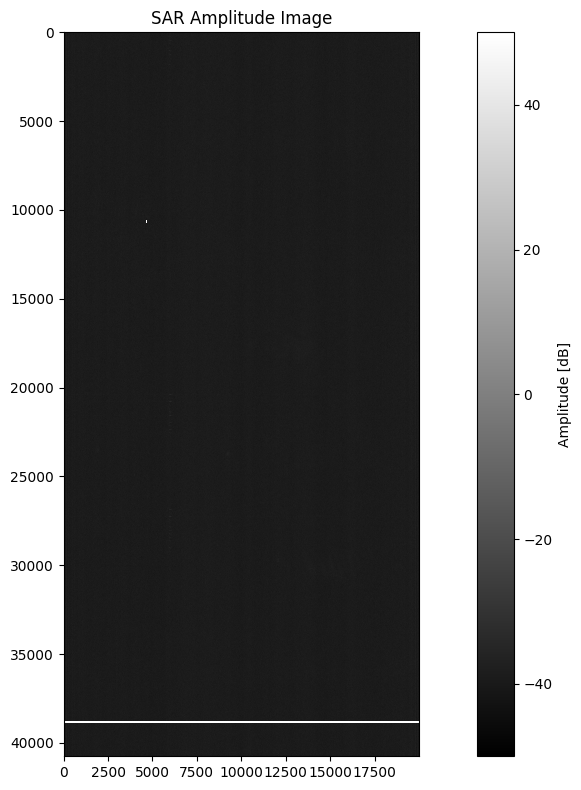

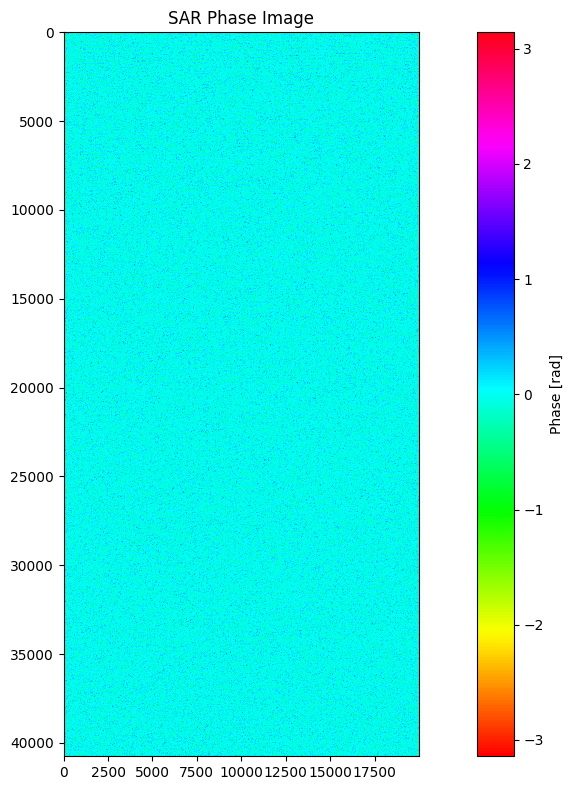

In [30]:
plt.figure(figsize=(12, 8))
plt.imshow(log_amplitude, cmap='gray', vmin=-50, vmax=50)
plt.colorbar(label='Amplitude [dB]')
plt.title('SAR Amplitude Image')
plt.tight_layout()
plt.show()

# 位相情報を表示
phase = np.angle(data)
plt.figure(figsize=(12, 8))
plt.imshow(phase, cmap='hsv')
plt.colorbar(label='Phase [rad]')
plt.title('SAR Phase Image')
plt.tight_layout()
plt.show()